- credits

https://www.geo.fu-berlin.de/en/v/soga-r/Basics-of-statistics/Hypothesis-Tests/Inferential-Methods-in-Regression-and-Correlation/Inferences-About-the-Slope/index.html#:~:text=The%20regression%20t%2Dtest%20is,(linear)%20predictor%20of%20y.

https://en.wikipedia.org/wiki/Student%27s_t-test

###### code for this is available at below link
https://github.com/sanjeev-kallepalli/training/blob/main/t_test.ipynb

# *t*-test

<p><i>t</i>-statistic is an inferential statistic to compare the means of two groups and how are they related.<br>This can also be applied when a group is to be tested with single value or two groups to be compared with each other.</p>

In the case of regression t-test, it is useful to determine if slope is significant. In other words, if the independent variable *x* is useful for predicting the dependent variable *y*

$$
  t = \frac{\bar{X}-\mu}{\frac{\hat\sigma}{\sqrt{n}}}
$$

$\bar{X}\space is\space sample\space mean \space of \space size \space n \newline \mu \space is \space population \space mean \newline \hat\sigma \space is \space standard \space deviation \space of \space population$

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/students.csv")

In [3]:
df.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [4]:
df.shape

(8239, 16)

In [5]:
data = df[['height', 'weight']]

In [6]:
data.head()

,height,weight
1,160,64.8
2,172,73.0
3,168,70.6
4,183,79.7
5,175,71.4


In [7]:
# by using height, can we predict weight?

In [51]:
n=21
data_sample = data.sample(n=21, random_state=200)

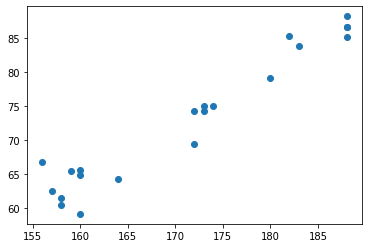

In [52]:
import matplotlib.pyplot as plt
plt.scatter(data_sample['height'], data_sample['weight'])

## Hypothesis testing

1. State the null hypothesis H0 and alternative hypothesis HA.
2. Decide on the significance level, α.
3. Compute the value of the test statistic.
4. Determine the p-value.
5. If p≤α, reject H0; otherwise, do not reject H0.
6. Interpret the result of the hypothesis test.

<p>In this case the hypothesis statements are as below<br>
null hypothesis:<br>
H0 = "There is no relation between height and weight, slope is zero."<br>
    This also means that height attribute cannot be used for predicting weight.<br>
alternate hypothesis<br>
H1 = "The height attribute is significant enough to have an effect in predicting weight, slope is non-zero"<br>
    This also means that height is having some relation with weight and can be useful in predicting it.</p>


In [50]:
import numpy as np
from scipy import stats

In [53]:
weight_mean = np.mean(data_sample["weight"])
height_mean = np.mean(data_sample["height"])

lm_beta = np.cov(data_sample.height, data_sample.weight)[0, 1] / (np.std(data_sample.height, ddof = 1)**2)
lm_beta 

0.8080333154218162

In [54]:
lm_alpha = weight_mean - lm_beta * height_mean
lm_alpha

-65.264938205266

In [55]:
y_hat = lm_alpha + data_sample["height"] * lm_beta 
SSE = np.sum((data_sample["weight"] - y_hat) ** 2)

SSE

120.89508866200948

In [58]:
se = np.sqrt(SSE / (n - 2))
se

2.5224788211724705

In [59]:
t_value = lm_beta / (se / np.sqrt(np.sum((data_sample["height"] - height_mean)**2)))
t_value # this is t statistic value

17.058477500461063

In [60]:
dof = n-2

In [62]:
p_value_lower = stats.t.cdf(-np.abs(t_value), dof)
p_value_upper = 1 - stats.t.cdf(t_value, dof)
p_value = p_value_lower + p_value_upper
p_value

5.617848964432106e-13

*p* = 5.61784 X $10^{-13}$

- as the value of p is less than 0.05, there is statistical evidence that the height and weight are related and height can be used as an attribute to predict weight.
- in other words we can say that the means of weight and height are within 95% confidence interval.